# Practistics Analytics Template
This is a template made for use with Practistics scrim data. Instructions:
-- Load as many scrim CSVs (of the same map) as required into a directory.
-- Paste the file paths of all the CSVs into the read CSVs function. 
-- Execute all the cells for the required analytics each cell provides.

In [5]:
!pip install matplotlib -q
!pip install seaborn -q
!pip install pandas -q

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

## Loading CSVs:
Enter all the file paths of the CSVs here, how many ever there are: 
(Make sure all the paths are inside the `[ ]` square brackets, surrounded by `' '` marks, and seperated by `,` commas)

**Example:**

>path_list = ['D:\PROJECTS\practistics-template\08_09_2023_Split_9-13.csv', 'D:\PROJECTS\practistics-template\08_09_2023_Split_13-9.csv']

In [20]:
path_list = [r'D:\PROJECTS\practistics-template\08_09_2023_Split_9-13.csv', r'D:\PROJECTS\practistics-template\08_09_2023_Split_13-9.csv', r'D:\PROJECTS\practistics-template\split_22_08_2023_time_12_56.csv', r'D:\PROJECTS\practistics-template\08_09_2023_Split_10-13.csv']

df = load_concat_csv(path_list)

df.team_buy = df.team_buy.str.replace(',','')
df.oppo_buy = df.oppo_buy.str.replace(',','')

df.team_buy = df.team_buy.astype(int)
df.oppo_buy = df.oppo_buy.astype(int)

df.head()

,first_kill,time,first_death,spike_plant,defuse,fb_team,fb_players,dt_players,team_buy,oppo_buy,total_kills,total_deaths,awps_info,side,round_win
0,Raze,0:32,Cypher,B,True,team,BOIt OP,PavamaN,800,700,1,5,none,Attack,loss
1,Sage,0:38,Gekko,False,False,opponent,Sasta rossi,bhooka,600,2600,0,5,none,Attack,loss
2,Sage,0:09,Viper,A,True,opponent,Sasta rossi,SadScientist,4200,3200,4,5,none,Attack,loss
3,Raze,0:07,Raze,False,False,team,BOIt OP,BOIt OP,3300,4600,6,4,none,Attack,win
4,Raze,0:04,Raze,B,False,opponent,BOIt OP,tam0w,3900,3400,5,4,none,Attack,win


# Analytics:

We will now run different standard queries on the given loaded dataset to give us various bits of information regarding scrim performances.

1) Attack Side vs Def Side Winrate

D:\PROJECTS\practistics-template\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\PROJECTS\practistics-template\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\PROJECTS\practistics-template\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\PROJECTS\practistics-template\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='oppo_buy', ylabel='team_buy'>

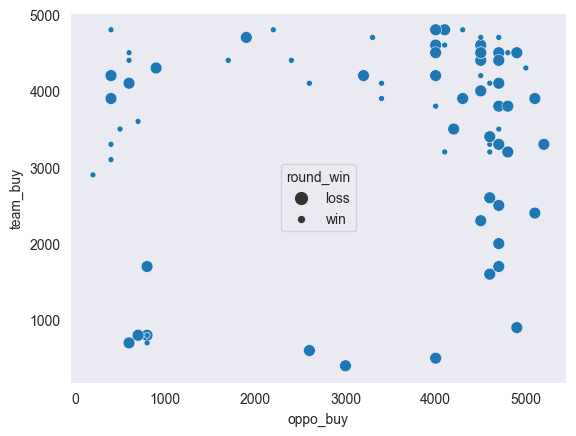

In [42]:
sns.scatterplot(df, x=df['oppo_buy'],y=df['team_buy'],size=df['round_win'], )

In [9]:
def load_concat_csv(paths):
    
    header = ['first_kill', 'time', 'first_death', 'spike_plant', 'defuse', 'fb_team', 'fb_players', 'dt_players',
              'team_buy', 'oppo_buy', 'total_kills', 'total_deaths', 'awps_info', 'side', 'round_win']

    df = pd.DataFrame()
    for path in paths:
        data = pd.read_csv(path)
        df = pd.concat([df, data], axis=0)
    
    return df